In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [2]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')

In [3]:
# print(lake.size().getInfo())
# print(lake.aggregate_array('NAME').distinct().getInfo())
# print(lake.first().propertyNames().getInfo())

In [4]:
# Function to create a five-sided polygon around the latitude and longitude
import ee
import geemap

# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 3 * 20

    
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0

    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees / 2],
        [lon + buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees / 2]
    ]

    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)

    return polygon

In [5]:
all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')
Map.addLayer(all_lakes)
Map.centerObject(all_lakes,16)
Map

Map(center=[44.06877752167093, -74.34748015610103], controls=(WidgetControl(options=['position', 'transparent_…

In [6]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')\
        .filter(ee.Filter.eq('NAME', 'Big Moose Lake'))
lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()
lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)
Map.addLayer(lake_polygon)
Map.centerObject(lake_polygon,16)
Map

Map(center=[43.830702693708865, -74.84829869692845], controls=(WidgetControl(options=['position', 'transparent…

In [7]:
# Import necessary libraries
import ee
import geemap

# Initialize Earth Engine
#ee.Authenticate()
ee.Initialize()

# Create a feature for the specific lake you're interested in
lake = ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids') \
    .filter(ee.Filter.eq('NAME', 'Lost Pond'))

# Get the coordinates of the point
lat = ee.Number(lake.first().geometry().coordinates().get(1))
lon = ee.Number(lake.first().geometry().coordinates().get(0))

# Create a buffer around the point
lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)



In [8]:
ee.Initialize()

lake_names = ['Windfall Pond', 'Middle Pond', 'Lake Alice 2', 'Lake Alice', 'Jabe Pond', 'Little Jabe Pond', 'Augur Lake',
              'Butternut Pond', 'Trout Pond', 'Bartlett pond', 'Raquette Lake Reservoir', 'Heavens Lake', 'Lake Roxanna',
              'Long Pond-Essex', 'Penfield Pond', 'Putnam Pond', 'Grass Pond', 'Squash Pond', 'Upper St. Regis Lake',
              'Lower St. Regis Lake', 'Spitfire Lake', 'Schroon Lake', 'Sagamore Lake', 'Moose Pond', 'Upper Asuable Lake',
              'Thirteenth Lake', 'Raquette Lake', 'Upper Chateaugay Lake', 'Willys Lake', 'Lake Everest', 'Moss Lake',
              'Amber Lake', 'Arbutus Pond', 'Mirror Lake', 'Rondaxe, Lake', 'Lake Algonquin', 'Limekiln Lake','Eighth Lake', 'Friends Lake', 'Lower Chateaugay Lake', 'Catlin Lake', 'Taylor Pond', 'Cranberry Lake',
              'Little Green Pond', 'East Pine Pond', 'Queer Lake', 'Irving Pond', 'Wolf Pond', 'Fern Lake', 'Lake Eaton',
              'Squaw Lake', 'Deer Pond', 'Clear Pond', 'Lens Lake', 'Zack Pond', 'East Caroga Lake', 'West Caroga Lake',
              'Kiwassa Lake', 'Lake Flower', 'Oseetah Lake', 'Lower Saranac Lake', 'stony Creek Pond', 'Ragged Lake',
              'Blue Mountain Lake', 'Eagle Lake', 'Fourth Lake', 'Jordan Lake', 'Long Pond', 'Lake Kushaqua',
              'Lake Placid', 'Trout Lake', 'Loon Lake', 'Big Moose Lake', 'Tupper Lake', 'Simon Pond', 'White Lake',
              'Floodwood Pond', 'North Lake', 'Indian Lake', 'Twitchell Lake', 'Little Simon Pond', 'Lower Asuable Lake',
              'Oxbow Lake', 'Gull Pond', 'Long Lake', 'Barnes Lake', 'Carry Pond', 'Little Clear Pond', 'Sochia Pond',
              'Little Rainbow Pond', 'Gordon Pond', 'Avalanche Lake', 'Little Hope Pond', 'Pleasant Lake', 'Fifth Lake',
              'Lost Pond', 'Otter Pond', 'Bone Pond', 'Sunday Pond', 'Echo Lake', 'Big Cherry Patch Pond', 'Chapel Pond',
              'Hidden Lake', 'West Pond', 'Copperas Pond', 'Heart Lake', 'Lower Cascade Lake', 'Frank Pond', 'Rush Pond',
              'Constable Pond', 'Morehouse Lake', 'Cascade Lake', 'Split Rock Pond', 'Polliwog Pond', 'Lake Adirondack',
              'Lake Titus', 'Slang Pond', 'Turtle Pond', 'Hoel Pond', 'Franklin Falls Reservoir', 'Mountain View Lake',
              'Rich Lake', 'Rat Pond', 'Alford Pond', 'Lake Colden', 'Lower Beaver Ponds', 'Round Pond', 'Woods Lake',
              'Green Pond', 'Lake Durant', 'Osgood Pond', 'Rainbow Lake', 'Canada Lake', 'Middle Saranac Lake',
              'Union Falls Pond', 'Chazy Lake', 'G Lake', 'Windover Lake', 'Pine Lake', 'Hewitt Pond', 'South Lake',
              'Follensby Clear Pond', 'Loon Hollows Pond', 'Middle Settlement Lake', 'Little Polliwog Pond', 'Black Pond',
              'Little Echo Pond', 'Moody Pond', 'Owl Pond', 'Owen Pond', 'Holcomb Pond', 'Upper Cascade Lake', 'Big Hope Pond',
              'Austin Pond', 'Nate Pond', 'Eli Pond', 'Otter Lake', 'Willis Lake', 'Brook Trout Lake', 'McCauley Pond',
              'Connery Pond', 'Little Long Lake', 'Rollins Pond', 'Paradox Lake', 'Sacandaga Lake', 'Chase Lake', 'Whey Pond',
              'Brandreth Lake', 'Fawn Lake', 'Lake Madeleine,', 'Lake Colby', 'Garnet Lake', 'Star Lake', 'Silver Lake', 'Dart Lake',
              'Mink Pond', 'Spy Lake', 'Lake Clear', 'Lake Pleasant', 'Middle Branch Lake', 'Jockeybush Lake', 'Green Lake',
              'Pine Pond', 'Tripp Pond', 'Horseshoe Pond', 'Fish Creek Pond', 'Fish Creek West', 'Upper Saranac Lake',
              'Fish Creek East', 'Little Square Pond']


# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')



# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    qa_values_to_filter = [5440, 5442, 5696, 13664]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    filtered_image = image.updateMask(mask)

    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = filtered_image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return filtered_image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).clip(all_lakes)


def maskL8sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    
    # Specify the QA values to filter
    qa_values_to_filter = [21824, 21826, 22080, 23888,30048,54596,54852,21952]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    # Apply the mask to filter the image
    filtered_image = image.updateMask(mask)
     # Apply the scaling factors to the appropriate bands.
    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = filtered_image.select('ST_B.*').multiply(0.00341802).add(-124.15)

    # Replace the original bands with the scaled ones and apply the masks.
    return filtered_image.addBands(opticalBands, None, True) \
        .addBands(thermalBands, None, True) \
        .updateMask(qaMask) \
        .updateMask(saturationMask)\
        .clip(all_lakes)



# # # # Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
# def reflectance(img, lake):
#     reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(),geometry=lake_polygon, scale=30).select(STD_NAMES)
#     return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

def reflectance(img, lake_polygon):
    # Combine reducers with shared inputs
    reducers = ee.Reducer.mean().combine(reducer2=ee.Reducer.stdDev(),sharedInputs=True)

    # Use the combined reducer to get the mean and SD of the image.
    reflectance_values = img.reduceRegion(reducer=reducers,bestEffort=True)
    
    # Set properties on the image
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)





# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}

# # Function to normalize specific bands within the image
# def normalize_image(image):
#     # Select the bands you want to normalize
#     bands_to_normalize = image.select(['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp'])  # Replace with your band names
    
#     # Normalize the selected bands within the image
#     normalized_bands = bands_to_normalize.divide(10000)  # Assuming Landsat 8, so max DN value is 10,000
    
#     # Combine the normalized bands with the original image
#     normalized_image = image.addBands(normalized_bands, None, True)
    
#     return normalized_image

# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve the lake using the filter
    lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')\
         .filter(ee.Filter.eq('NAME', SITE_NAME))

   
    # Get the latitude and longitude of the station point
    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

     # Create a polygon around the station point using the latitude and longitude
    #lake_polygon = create_lake_polygon(lon, lat).buffer(1000)
    lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

    l8 =ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filter(ee.Filter.calendarRange(5, 11, 'month')) \
            .filterBounds(lake_polygon) \
            .filter(ee.Filter.lt('CLOUD_COVER', 15)) \
            .map(maskL8sr) \
            .select(LC8_BANDS, STD_NAMES)
        
    # #merge landsat 5 and landsat 8
    # lall = ee.ImageCollection(l5.merge(l8));
    
    # lall_normalized= lall.map(normalize_image)

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = l5.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)

df_all_lakes.dropna(inplace=True)

df_all_lakes

#36361 rows × 11 columns

,DATE_SMP,QA_mean,QA_stdDev,blue_mean,blue_stdDev,green_mean,green_stdDev,nir_mean,nir_stdDev,red_mean,red_stdDev,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,SITE_NAME,LAKE_LABEL
8788,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Oseetah Lake,59
3574,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Upper Chateaugay Lake,27
11677,1985-07-13,5440.0,0.0,0.019909,0.006100,0.028959,0.010375,0.113395,0.123883,0.021263,0.010294,0.049405,0.059114,0.022127,0.024922,21.600029,1.684949,North Lake,77
20205,1985-07-13,5440.0,0.0,0.019909,0.006100,0.028959,0.010375,0.113395,0.123883,0.021263,0.010294,0.049405,0.059114,0.022127,0.024922,21.600029,1.684949,Canada Lake,132
15114,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Echo Lake,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,2011-10-09,5440.0,0.0,0.024909,0.005446,0.036043,0.011406,0.114496,0.065904,0.035068,0.013920,0.076543,0.050911,0.038109,0.025084,19.249159,1.764235,Cascade Lake,111
21915,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,Little Polliwog Pond,144
2804,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,Sagamore Lake,22
25169,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,"Lake Madeleine,",169


In [9]:
df_all_lakes['SITE_NAME'] = df_all_lakes['SITE_NAME'].str.replace('*', '')
df_all_lakes

,DATE_SMP,QA_mean,QA_stdDev,blue_mean,blue_stdDev,green_mean,green_stdDev,nir_mean,nir_stdDev,red_mean,red_stdDev,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,SITE_NAME,LAKE_LABEL
8788,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Oseetah Lake,59
3574,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Upper Chateaugay Lake,27
11677,1985-07-13,5440.0,0.0,0.019909,0.006100,0.028959,0.010375,0.113395,0.123883,0.021263,0.010294,0.049405,0.059114,0.022127,0.024922,21.600029,1.684949,North Lake,77
20205,1985-07-13,5440.0,0.0,0.019909,0.006100,0.028959,0.010375,0.113395,0.123883,0.021263,0.010294,0.049405,0.059114,0.022127,0.024922,21.600029,1.684949,Canada Lake,132
15114,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Echo Lake,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,2011-10-09,5440.0,0.0,0.024909,0.005446,0.036043,0.011406,0.114496,0.065904,0.035068,0.013920,0.076543,0.050911,0.038109,0.025084,19.249159,1.764235,Cascade Lake,111
21915,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,Little Polliwog Pond,144
2804,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,Sagamore Lake,22
25169,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,"Lake Madeleine,",169


In [10]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler with the desired feature range
# scaler = MinMaxScaler(feature_range=(0, 1))

# # List of bands you want to normalize
# bands_to_normalize = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'temp']

# # Normalize the selected columns
# df_all_lakes[bands_to_normalize] = scaler.fit_transform(df_all_lakes[bands_to_normalize])

# # The selected columns have been normalized to the range [0, 1]


In [11]:
df_all_lakes

,DATE_SMP,QA_mean,QA_stdDev,blue_mean,blue_stdDev,green_mean,green_stdDev,nir_mean,nir_stdDev,red_mean,red_stdDev,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,SITE_NAME,LAKE_LABEL
8788,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Oseetah Lake,59
3574,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Upper Chateaugay Lake,27
11677,1985-07-13,5440.0,0.0,0.019909,0.006100,0.028959,0.010375,0.113395,0.123883,0.021263,0.010294,0.049405,0.059114,0.022127,0.024922,21.600029,1.684949,North Lake,77
20205,1985-07-13,5440.0,0.0,0.019909,0.006100,0.028959,0.010375,0.113395,0.123883,0.021263,0.010294,0.049405,0.059114,0.022127,0.024922,21.600029,1.684949,Canada Lake,132
15114,1985-07-13,5440.0,0.0,0.019931,0.005516,0.029714,0.009337,0.115726,0.121530,0.022291,0.008638,0.049907,0.055585,0.022452,0.021940,21.443267,1.477406,Echo Lake,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,2011-10-09,5440.0,0.0,0.024909,0.005446,0.036043,0.011406,0.114496,0.065904,0.035068,0.013920,0.076543,0.050911,0.038109,0.025084,19.249159,1.764235,Cascade Lake,111
21915,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,Little Polliwog Pond,144
2804,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,Sagamore Lake,22
25169,2011-10-09,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,0.113812,0.064069,0.033429,0.014185,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,"Lake Madeleine,",169


In [12]:
# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = df_all_lakes['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#output:Number of Unique Lakes: 199
#after dropping null values the lakes are still 199

Number of Unique Lakes: 190


In [13]:
import pandas as pd


# Read the Excel file
data_excel = pd.read_excel("LTM_Data_2023_3_9 (2).xlsx", usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP', 'SAMPLE_LOCATION'])
data_excel_site = pd.read_excel("Site_Information_2022_8_1 (2).xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

data_second_sheet_COORD = pd.read_excel("ALTM-50-stations (1).xlsx",
                                 sheet_name='updated station coordinates', usecols=['SITE_ID', 'LATDD', 'LONDD','LATDD_CENT','LONDD_CENT','SITE_NAME'])

# Merge the two DataFrames based on the common column 'SITE_ID'
merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_combined = pd.merge(merged_data_excel, data_second_sheet_COORD, on=['SITE_ID', 'SITE_NAME'])

data_modified = merged_data_combined.drop(columns=['SAMPLE_LOCATION'])


#pd.set_option('display.max_rows', None)
# Display the merged DataFrame
(data_modified)


,SITE_ID,DATE_SMP,DOC_MG_L,PROGRAM_ID,SITE_NAME,LAKE_DEPTH_MEAN,LATDD,LONDD,LATDD_CENT,LONDD_CENT
0,040850,1997-09-22,3.100000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
1,040850,1997-09-22,3.100000,LTM_ME,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
2,040850,1995-03-02,3.031000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
3,040850,1995-03-02,3.031000,LTM_ME,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
4,040850,1996-08-19,3.595000,LTM_ALTM,Squaw Lake,3.4,43.63645,-74.73844,43.63276,-74.73863
...,...,...,...,...,...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17864,1A3-048,2015-06-10,5.509394,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17865,1A3-048,2016-07-14,4.884900,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172
17866,1A3-048,2016-09-15,6.344000,LTM_ALTM,Grass Pond,1.5,43.69066,-75.06462,43.69207,-75.06172


In [14]:
data_ALAP = pd.read_excel("AWI-ADK.xlsx", usecols=['AWI Site ID', 'AWI Waterbody ID', 'Waterbody Name', 'Parameter','Sample Date','Reported Value','Units'])
doc_data = data_ALAP[data_ALAP['Parameter'] == 'Dissolved Organic Carbon']


doc_data

,AWI Site ID,AWI Waterbody ID,Waterbody Name,Sample Date,Parameter,Reported Value,Units
62,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-06-21,Dissolved Organic Carbon,4.510,mg/L
65,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-07-21,Dissolved Organic Carbon,6.060,mg/L
68,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-08-03,Dissolved Organic Carbon,6.110,mg/L
71,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-08-30,Dissolved Organic Carbon,5.970,mg/L
74,AWI00001.1,AWI00001,Lower St. Regis Lake,2017-09-27,Dissolved Organic Carbon,5.600,mg/L
...,...,...,...,...,...,...,...
8720,AWI00318.1,AWI00318,Green Lake,2022-07-20,Dissolved Organic Carbon,2.671,mg/L
8723,AWI00318.1,AWI00318,Green Lake,2022-08-15,Dissolved Organic Carbon,2.782,mg/L
8726,AWI00319.1,AWI00319,Ragged Lake,2022-08-12,Dissolved Organic Carbon,11.710,mg/L
8729,AWI00319.1,AWI00319,Ragged Lake,2022-09-17,Dissolved Organic Carbon,11.500,mg/L


In [15]:
alap_data= pd.read_excel("ALAP_DATA (1).xlsx")
alap_data.rename(columns={'LAKE_NAME': 'Waterbody Name'}, inplace=True)
alap_data = alap_data[~alap_data.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

alap_data

,WATERBODY_ID,Waterbody Name,LAT,LON,LAKE_DEPTH (m),SURFACE_AREA (ha),TROPHIC_STATE
0,AWI00001,Lower St. Regis Lake,44.427034,-74.248048,11.6,NaN,Mesotrophic
1,AWI00002,Spitfire Lake,44.417981,-74.269630,9.4,NaN,Mesotrophic
2,AWI00003,Upper St. Regis Lake,44.408394,-74.285134,20.1,NaN,Mesotrophic
3,AWI00004,Butternut Pond,44.430696,-73.495663,6.3,65.8,Oligotrophic
4,AWI00006,Osgood Pond,44.451070,-74.228505,4.6,108.0,Mesotrophic
...,...,...,...,...,...,...,...
157,AWI00262,Whey Pond,44.307694,-74.392854,6.1,47.4,Mesotrophic
158,AWI00263,West Caroga Lake,43.137154,-74.495462,21.3,129.0,Oligotrophic
160,AWI00317,Bartlett Pond,44.106152,-73.511043,6.1,40.0,Oligotrophic
161,AWI00318,Green Lake,43.175716,-74.506639,16.7,NaN,Oligotrophic


In [16]:
merged_alap_excel = pd.merge(doc_data, alap_data, on=['Waterbody Name'])
merged_alap_excel.rename(columns={'AWI Waterbody ID': 'SITE_ID' }, inplace=True)
merged_alap_excel.rename(columns={'Waterbody Name': 'SITE_NAME' }, inplace=True)
merged_alap_excel.rename(columns={'Reported Value': 'DOC_MG_L'}, inplace=True)
merged_alap_excel.rename(columns={'LAKE_DEPTH (m)': 'LAKE_DEPTH_MEAN'}, inplace=True)
merged_alap_excel.rename(columns={'Sample Date': 'DATE_SMP'}, inplace=True)
merged_alap_excel = merged_alap_excel[~merged_alap_excel.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

selected_columns_alap = merged_alap_excel[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]
selected_columns_alap


,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,AWI00001,2017-06-21,4.510,Lower St. Regis Lake,11.6
1,AWI00001,2017-07-21,6.060,Lower St. Regis Lake,11.6
2,AWI00001,2017-08-03,6.110,Lower St. Regis Lake,11.6
3,AWI00001,2017-08-30,5.970,Lower St. Regis Lake,11.6
4,AWI00001,2017-09-27,5.600,Lower St. Regis Lake,11.6
...,...,...,...,...,...
1571,AWI00317,2022-08-16,4.685,Bartlett Pond,6.1
1572,AWI00317,2022-09-20,4.532,Bartlett Pond,6.1
1573,AWI00319,2022-08-12,11.710,Ragged Lake,15.2
1574,AWI00319,2022-09-17,11.500,Ragged Lake,15.2


In [17]:
selected_columns_ALTM = data_modified[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]

# Divide the 'LAKE_DEPTH_MEAN' column by 100
# selected_columns_ALTM['LAKE_DEPTH_MEAN'] = selected_columns_ALTM['LAKE_DEPTH_MEAN'] / 1000

selected_columns_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100000,Squaw Lake,3.4
1,040850,1997-09-22,3.100000,Squaw Lake,3.4
2,040850,1995-03-02,3.031000,Squaw Lake,3.4
3,040850,1995-03-02,3.031000,Squaw Lake,3.4
4,040850,1996-08-19,3.595000,Squaw Lake,3.4
...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,Grass Pond,1.5
17864,1A3-048,2015-06-10,5.509394,Grass Pond,1.5
17865,1A3-048,2016-07-14,4.884900,Grass Pond,1.5
17866,1A3-048,2016-09-15,6.344000,Grass Pond,1.5


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'LAKE_DEPTH_MEAN' column
selected_columns_ALTM['LAKE_DEPTH_MEAN'] = scaler.fit_transform(selected_columns_ALTM[['LAKE_DEPTH_MEAN']])


In [19]:
selected_columns_ALTM

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100000,Squaw Lake,0.262136
1,040850,1997-09-22,3.100000,Squaw Lake,0.262136
2,040850,1995-03-02,3.031000,Squaw Lake,0.262136
3,040850,1995-03-02,3.031000,Squaw Lake,0.262136
4,040850,1996-08-19,3.595000,Squaw Lake,0.262136
...,...,...,...,...,...
17863,1A3-048,2011-05-18,4.283944,Grass Pond,0.077670
17864,1A3-048,2015-06-10,5.509394,Grass Pond,0.077670
17865,1A3-048,2016-07-14,4.884900,Grass Pond,0.077670
17866,1A3-048,2016-09-15,6.344000,Grass Pond,0.077670


In [20]:
# merge_50_87 = pd.merge(data_modified, merged_alap_excel, on='DATE_SMP')
# merge_50_87
concatenated_df = pd.concat([selected_columns_ALTM, selected_columns_alap], axis=0, ignore_index=True)
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'LAKE_DEPTH_MEAN' column
concatenated_df['LAKE_DEPTH_MEAN'] = scaler.fit_transform(concatenated_df[['LAKE_DEPTH_MEAN']])

concatenated_df.dropna(inplace=True)
concatenated_df

,SITE_ID,DATE_SMP,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN
0,040850,1997-09-22,3.100,Squaw Lake,0.004854
1,040850,1997-09-22,3.100,Squaw Lake,0.004854
2,040850,1995-03-02,3.031,Squaw Lake,0.004854
3,040850,1995-03-02,3.031,Squaw Lake,0.004854
4,040850,1996-08-19,3.595,Squaw Lake,0.004854
...,...,...,...,...,...
19439,AWI00317,2022-08-16,4.685,Bartlett Pond,0.112963
19440,AWI00317,2022-09-20,4.532,Bartlett Pond,0.112963
19441,AWI00319,2022-08-12,11.710,Ragged Lake,0.281481
19442,AWI00319,2022-09-17,11.500,Ragged Lake,0.281481


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=1))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_stdDev'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 30  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 1 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 460
Number of columns: 6
*************Predicted Training data (RandomForest)***************
       blue_stdDev  green_stdDev  red_stdDev  nir_stdDev  swir1_stdDev  \
6057      0.009565      0.011375    0.012443    0.120955      0.056073   
9518      0.005282      0.009293    0.009392    0.088444      0.049021   
9520      0.005282      0.009293    0.009392    0.088444      0.049021   
6063      0.009565      0.011375    0.012443    0.120955      0.056073   
8792      0.006031      0.010245    0.009953    0.113214      0.055190   
7699      0.087812      0.099544    0.105761    0.114536      0.035317   
1799      0.017798      0.021303    0.024946    0.051462      0.053518   
2511      0.051433      0.057928    0.060193    0.080620      0.026711   
12154     0.009438      0.010169    0.009278    0.107540      0.060100   
2512      0.051433      0.057928    0.060193    0.080620      0.026711   
12152     0.009438  

In [22]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['XGBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("XGBoost Feature Importances:")
print(feature_importance_df)


XGBoost Feature Importances:
        Feature  Importance
0   blue_stdDev    0.193781
1  green_stdDev    0.036217
2    red_stdDev    0.000000
3    nir_stdDev    0.626890
4  swir1_stdDev    0.047637
5  swir2_stdDev    0.095475


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=1))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_mean'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 30  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 1 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 460
Number of columns: 6
*************Predicted Training data (RandomForest)***************
       blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
6059    0.028053    0.039052  0.032647  0.131297    0.068749    0.036348   
9521    0.017489    0.027726  0.020501  0.129951    0.065258    0.028527   
9522    0.017489    0.027726  0.020501  0.129951    0.065258    0.028527   
6065    0.028053    0.039052  0.032647  0.131297    0.068749    0.036348   
8804    0.017217    0.026305  0.018727  0.131988    0.059504    0.024918   
7696    0.149914    0.155182  0.152591  0.200427    0.071596    0.050514   
1804    0.051349    0.058617  0.056485  0.105959    0.077002    0.046264   
2513    0.120301    0.124315  0.115193  0.147985    0.035083    0.022231   
12151   0.041401    0.045581  0.031147  0.121855    0.036267    0.015669   
2516    0.120301    0.124315  0.115193  0.147985    0.035083    0.022231  

In [24]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['XGBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("XGBoost Feature Importances:")
print(feature_importance_df)


XGBoost Feature Importances:
      Feature  Importance
0   blue_mean    0.016036
1  green_mean    0.501551
2    red_mean    0.000014
3    nir_mean    0.210529
4  swir1_mean    0.000068
5  swir2_mean    0.271800


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=1))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_mean'])
merged_data_all = merged_data_all.dropna(subset=['blue_stdDev'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean','blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 30  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean','blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 1 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 460
Number of columns: 12
*************Predicted Training data (RandomForest)***************
       blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
6057    0.028053    0.039052  0.032647  0.131297    0.068749    0.036348   
9518    0.017489    0.027726  0.020501  0.129951    0.065258    0.028527   
9520    0.017489    0.027726  0.020501  0.129951    0.065258    0.028527   
6063    0.028053    0.039052  0.032647  0.131297    0.068749    0.036348   
8793    0.017217    0.026305  0.018727  0.131988    0.059504    0.024918   
7706    0.149914    0.155182  0.152591  0.200427    0.071596    0.050514   
1799    0.051349    0.058617  0.056485  0.105959    0.077002    0.046264   
2511    0.120301    0.124315  0.115193  0.147985    0.035083    0.022231   
12153   0.041401    0.045581  0.031147  0.121855    0.036267    0.015669   
2512    0.120301    0.124315  0.115193  0.147985    0.035083    0.022231 

In [26]:

# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#Number of Unique Lakes: 80

Number of Unique Lakes: 44


In [27]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['XGBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("XGBoost Feature Importances:")
print(feature_importance_df)


XGBoost Feature Importances:
         Feature  Importance
0      blue_mean    0.013658
1     green_mean    0.563017
2       red_mean    0.000005
3       nir_mean    0.309170
4     swir1_mean    0.000066
5     swir2_mean    0.000000
6    blue_stdDev    0.000004
7   green_stdDev    0.000000
8     red_stdDev    0.000000
9     nir_stdDev    0.067965
10  swir1_stdDev    0.000000
11  swir2_stdDev    0.046115


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_stdDev'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 40  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 864
Number of columns: 6
*************Predicted Training data (RandomForest)***************
       blue_stdDev  green_stdDev  red_stdDev  nir_stdDev  swir1_stdDev  \
8803      0.006031      0.010245    0.009953    0.113214      0.055190   
7372      0.009749      0.014662    0.013166    0.122752      0.062165   
12156     0.009438      0.010169    0.009278    0.107540      0.060100   
7690      0.087812      0.099544    0.105761    0.114536      0.035317   
6065      0.009565      0.011375    0.012443    0.120955      0.056073   
8802      0.006031      0.010245    0.009953    0.113214      0.055190   
10868     0.007222      0.012878    0.012233    0.115004      0.058492   
10660     0.009712      0.015135    0.021071    0.052234      0.068986   
10244     0.009317      0.011944    0.011785    0.085755      0.051659   
1801      0.017798      0.021303    0.024946    0.051462      0.053518   
10659     0.009712  

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_mean'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 40  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 864
Number of columns: 6
*************Predicted Training data (RandomForest)***************
       blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
8794    0.017217    0.026305  0.018727  0.131988    0.059504    0.024918   
7389    0.025230    0.036986  0.028146  0.109520    0.054068    0.028021   
12156   0.041401    0.045581  0.031147  0.121855    0.036267    0.015669   
7705    0.149914    0.155182  0.152591  0.200427    0.071596    0.050514   
6063    0.028053    0.039052  0.032647  0.131297    0.068749    0.036348   
8793    0.017217    0.026305  0.018727  0.131988    0.059504    0.024918   
10868   0.019682    0.026364  0.019606  0.095359    0.045573    0.022327   
10660   0.024780    0.037464  0.039887  0.100974    0.099349    0.061934   
10244   0.035766    0.040223  0.034792  0.103673    0.059528    0.032562   
1792    0.051349    0.058617  0.056485  0.105959    0.077002    0.046264  

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_mean'])
merged_data_all = merged_data_all.dropna(subset=['blue_stdDev'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean','blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 40  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean','blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 864
Number of columns: 12
*************Predicted Training data (RandomForest)***************
       blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
8802    0.017217    0.026305  0.018727  0.131988    0.059504    0.024918   
7372    0.025230    0.036986  0.028146  0.109520    0.054068    0.028021   
12155   0.041401    0.045581  0.031147  0.121855    0.036267    0.015669   
7691    0.149914    0.155182  0.152591  0.200427    0.071596    0.050514   
6065    0.028053    0.039052  0.032647  0.131297    0.068749    0.036348   
8801    0.017217    0.026305  0.018727  0.131988    0.059504    0.024918   
10868   0.019682    0.026364  0.019606  0.095359    0.045573    0.022327   
10660   0.024780    0.037464  0.039887  0.100974    0.099349    0.061934   
10244   0.035766    0.040223  0.034792  0.103673    0.059528    0.032562   
1801    0.051349    0.058617  0.056485  0.105959    0.077002    0.046264 

In [31]:

# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#Number of Unique Lakes: 92


Number of Unique Lakes: 44


In [32]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
         Feature  Importance
0      blue_mean    0.057838
1     green_mean    0.077205
2       red_mean    0.066209
3       nir_mean    0.103638
4     swir1_mean    0.018076
5     swir2_mean    0.017655
6    blue_stdDev    0.038194
7   green_stdDev    0.042027
8     red_stdDev    0.034233
9     nir_stdDev    0.046454
10  swir1_stdDev    0.448488
11  swir2_stdDev    0.049984


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_stdDev'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 80  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 1552
Number of columns: 6
*************Predicted Training data (RandomForest)***************
       blue_stdDev  green_stdDev  red_stdDev  nir_stdDev  swir1_stdDev  \
7387      0.009749      0.014662    0.013166    0.122752      0.062165   
10795     0.007814      0.009848    0.008820    0.121946      0.059072   
8813      0.006031      0.010245    0.009953    0.113214      0.055190   
9551      0.012242      0.008978    0.009390    0.088792      0.048304   
4090      0.008190      0.010844    0.010875    0.138480      0.062560   
8676      0.012176      0.016900    0.022746    0.064737      0.072779   
10044     0.009350      0.010919    0.011092    0.100911      0.051703   
13545     0.004976      0.010871    0.014185    0.064069      0.047527   
2312      0.004882      0.009102    0.008568    0.108486      0.055029   
9429      0.008367      0.009105    0.009128    0.118397      0.058128   
9549      0.012242 

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_mean'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 80  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 1552
Number of columns: 6
*************Predicted Training data (RandomForest)***************
       blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
7366    0.025230    0.036986  0.028146  0.109520    0.054068    0.028021   
10787   0.031208    0.037153  0.027213  0.105311    0.041535    0.020358   
8814    0.017217    0.026305  0.018727  0.131988    0.059504    0.024918   
9548    0.017489    0.027726  0.020501  0.129951    0.065258    0.028527   
4084    0.023117    0.029977  0.024821  0.141260    0.066462    0.031569   
8675    0.037543    0.047250  0.047520  0.119025    0.103501    0.063263   
10030   0.029368    0.040681  0.033429  0.111942    0.060670    0.033832   
13545   0.023232    0.035700  0.033429  0.113812    0.069839    0.033569   
2312    0.016342    0.023416  0.017014  0.084497    0.034175    0.014716   
9430    0.036838    0.043482  0.033029  0.117337    0.043991    0.025662 

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)


#QA_mean	QA_stdDev	blue_mean	blue_stdDev	green_mean	green_stdDev	nir_mean	nir_stdDev	
#red_mean	red_stdDev	swir1_mean	swir1_stdDev	swir2_mean	swir2_stdDev	temp_mean	temp_stdDev

merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue_mean'])
merged_data_all = merged_data_all.dropna(subset=['blue_stdDev'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Preparing the training data 
X = merged_data_all[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean','blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 80  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean','blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# Bands AS FEATURES 7 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 1552
Number of columns: 12
*************Predicted Training data (RandomForest)***************
       blue_mean  green_mean  red_mean  nir_mean  swir1_mean  swir2_mean  \
7387    0.025230    0.036986  0.028146  0.109520    0.054068    0.028021   
10796   0.031208    0.037153  0.027213  0.105311    0.041535    0.020358   
8813    0.017217    0.026305  0.018727  0.131988    0.059504    0.024918   
9552    0.017489    0.027726  0.020501  0.129951    0.065258    0.028527   
4089    0.023117    0.029977  0.024821  0.141260    0.066462    0.031569   
8675    0.037543    0.047250  0.047520  0.119025    0.103501    0.063263   
10041   0.029368    0.040681  0.033429  0.111942    0.060670    0.033832   
13545   0.024909    0.036043  0.035068  0.114496    0.076543    0.038109   
2312    0.016342    0.023416  0.017014  0.084497    0.034175    0.014716   
9430    0.036838    0.043482  0.033029  0.117337    0.043991    0.025662

In [36]:
merged_data_all

,SITE_ID,DOC_MG_L,SITE_NAME,LAKE_DEPTH_MEAN,QA_mean,QA_stdDev,blue_mean,blue_stdDev,green_mean,green_stdDev,...,swir1_mean,swir1_stdDev,swir2_mean,swir2_stdDev,temp_mean,temp_stdDev,LAKE_LABEL,year,month,day
261,1A1-052,5.000000,Arbutus Pond,0.003776,5440.0,0.0,0.018074,0.005173,0.028967,0.010637,...,0.057807,0.061748,0.025563,0.025131,21.302444,1.490738,32.0,1985,7,22
262,1A2-077,3.300000,Clear Pond,0.015282,5440.0,0.0,0.018074,0.005173,0.028967,0.010637,...,0.057807,0.061748,0.025563,0.025131,21.302444,1.490738,52.0,1985,7,22
263,1A1-107,13.800000,Little Echo Pond,0.003955,5440.0,0.0,0.018074,0.005173,0.028967,0.010637,...,0.057807,0.061748,0.025563,0.025131,21.302444,1.490738,146.0,1985,7,22
264,1A1-102,3.000000,Heart Lake,0.007911,5440.0,0.0,0.018074,0.005173,0.028967,0.010637,...,0.057807,0.061748,0.025563,0.025131,21.302444,1.490738,105.0,1985,7,22
285,1A1-102,3.300000,Heart Lake,0.007911,5440.0,0.0,0.023057,0.007282,0.032112,0.011612,...,0.070173,0.049844,0.038004,0.029615,9.993800,1.171468,105.0,1985,10,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,020197,4.376060,Sochia Pond,0.004315,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,...,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,88.0,2011,10,13
13560,1A1-102,2.505132,Heart Lake,0.007911,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,...,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,105.0,2011,10,13
13561,030172,6.896269,Little Clear Pond,0.008630,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,...,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,87.0,2011,10,13
13562,1A1-029,5.538773,Middle Pond,0.001438,5440.0,0.0,0.023232,0.004976,0.035700,0.010871,...,0.069839,0.047527,0.033569,0.023126,18.539451,1.787788,1.0,2011,10,13


In [37]:
# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = merged_data_all['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")
#Number of Unique Lakes: 111

Number of Unique Lakes: 44


In [38]:
unique_lake_names

261                Arbutus Pond
262                  Clear Pond
263            Little Echo Pond
264                  Heart Lake
290              Big Moose Lake
291                   Moss Lake
292                   Dart Lake
825                  Squaw Lake
827                 Indian Lake
928                   Lost Pond
932                  Woods Lake
933             Jockeybush Lake
934                      G Lake
935               Limekiln Lake
936     Raquette Lake Reservoir
937               Sagamore Lake
939                  Grass Pond
940          Middle Branch Lake
941      Middle Settlement Lake
942                 Willys Lake
945                   Long Pond
946                  Carry Pond
947           Little Simon Pond
1067                 Queer Lake
1068                  West Pond
1100          Little Clear Pond
1101                Middle Pond
1103              Big Hope Pond
1107                Sochia Pond
1110                Sunday Pond
1111           Little Hope Pond
1112    

In [39]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
         Feature  Importance
0      blue_mean    0.034641
1     green_mean    0.042662
2       red_mean    0.035911
3       nir_mean    0.072066
4     swir1_mean    0.025610
5     swir2_mean    0.023257
6    blue_stdDev    0.046713
7   green_stdDev    0.018116
8     red_stdDev    0.022822
9     nir_stdDev    0.225455
10  swir1_stdDev    0.187431
11  swir2_stdDev    0.265317


In [40]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['AdaBoost']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("AdaBoost Feature Importances:")
print(feature_importance_df)


AdaBoost Feature Importances:
         Feature  Importance
0      blue_mean    0.020836
1     green_mean    0.026438
2       red_mean    0.030900
3       nir_mean    0.165415
4     swir1_mean    0.040708
5     swir2_mean    0.047987
6    blue_stdDev    0.014938
7   green_stdDev    0.008317
8     red_stdDev    0.029927
9     nir_stdDev    0.190457
10  swir1_stdDev    0.152983
11  swir2_stdDev    0.271094


In [41]:
# Print the size (number of data points) for training and testing data
print(f"Size of Training Data: {len(data_train)} data points")
print(f"Size of Testing Data: {len(data_test)} data points")


Size of Training Data: 56 data points
Size of Testing Data: 24 data points


In [42]:
import pandas as pd

# Assuming df_all_lakes is your DataFrame
#'blue', 'green', 'red', 'nir', 'swir1', 'swir2'
# Reorder the columns as desired
new_order = ['blue_mean', 'green_mean', 'red_mean', 'nir_mean', 'swir1_mean', 'swir2_mean','blue_stdDev', 'green_stdDev', 'red_stdDev', 'nir_stdDev', 'swir1_stdDev', 'swir2_stdDev','DATE_SMP','SITE_NAME', 'LAKE_LABEL']
df_all_lakes = df_all_lakes[new_order]

# Drop rows with missing values
# df_all_lakes.dropna(inplace=True)


In [43]:
# Extract only the first four bands from the DataFrame
X_TEST = df_all_lakes.iloc[:, :12]

# Print the DataFrame
(X_TEST)

,blue_mean,green_mean,red_mean,nir_mean,swir1_mean,swir2_mean,blue_stdDev,green_stdDev,red_stdDev,nir_stdDev,swir1_stdDev,swir2_stdDev
8788,0.019931,0.029714,0.022291,0.115726,0.049907,0.022452,0.005516,0.009337,0.008638,0.121530,0.055585,0.021940
9098,0.019931,0.029714,0.022291,0.115726,0.049907,0.022452,0.005516,0.009337,0.008638,0.121530,0.055585,0.021940
9253,0.019931,0.029714,0.022291,0.115726,0.049907,0.022452,0.005516,0.009337,0.008638,0.121530,0.055585,0.021940
8478,0.019931,0.029714,0.022291,0.115726,0.049907,0.022452,0.005516,0.009337,0.008638,0.121530,0.055585,0.021940
25913,0.019931,0.029714,0.022291,0.115726,0.049907,0.022452,0.005516,0.009337,0.008638,0.121530,0.055585,0.021940
...,...,...,...,...,...,...,...,...,...,...,...,...
11458,0.024909,0.036043,0.035068,0.114496,0.076543,0.038109,0.005446,0.011406,0.013920,0.065904,0.050911,0.025084
27540,0.023232,0.035700,0.033429,0.113812,0.069839,0.033569,0.004976,0.010871,0.014185,0.064069,0.047527,0.023126
13100,0.024909,0.036043,0.035068,0.114496,0.076543,0.038109,0.005446,0.011406,0.013920,0.065904,0.050911,0.025084
3260,0.024909,0.036043,0.035068,0.114496,0.076543,0.038109,0.005446,0.011406,0.013920,0.065904,0.050911,0.025084


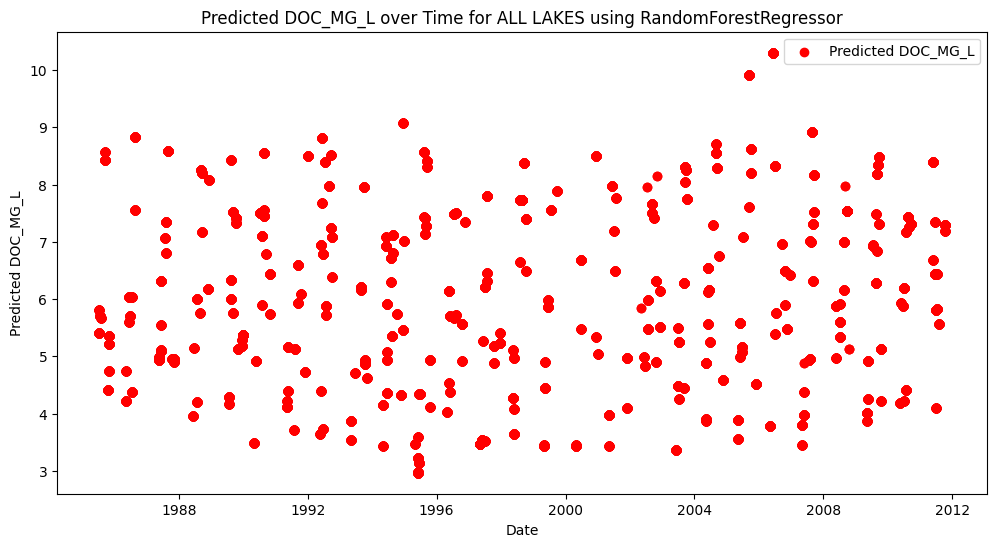

In [44]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model = GradientBoostingRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
#df_plot = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot['DATE_SMP'], df_plot['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for ALL LAKES using RandomForestRegressor')
plt.legend()
plt.show()


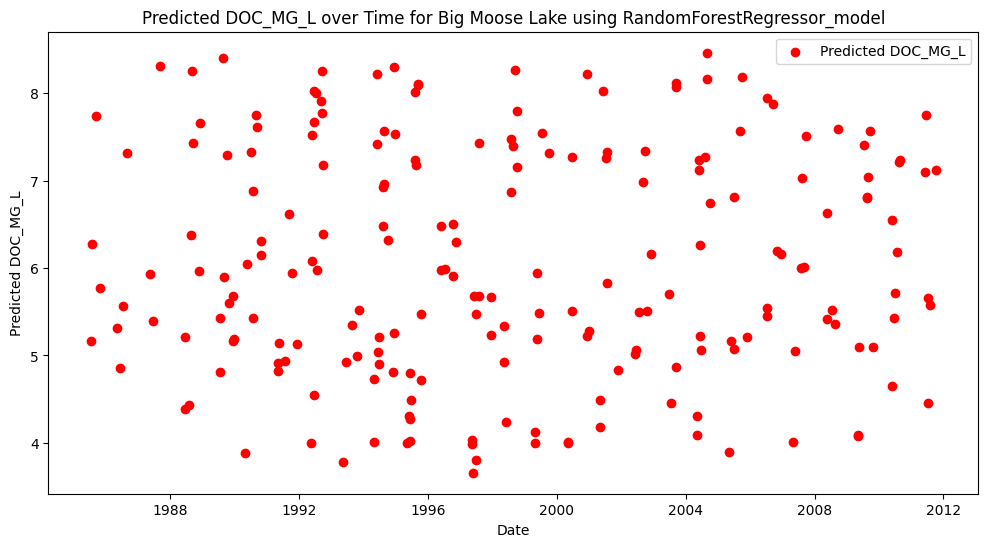

In [45]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model =  RandomForestRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.legend()
plt.show()


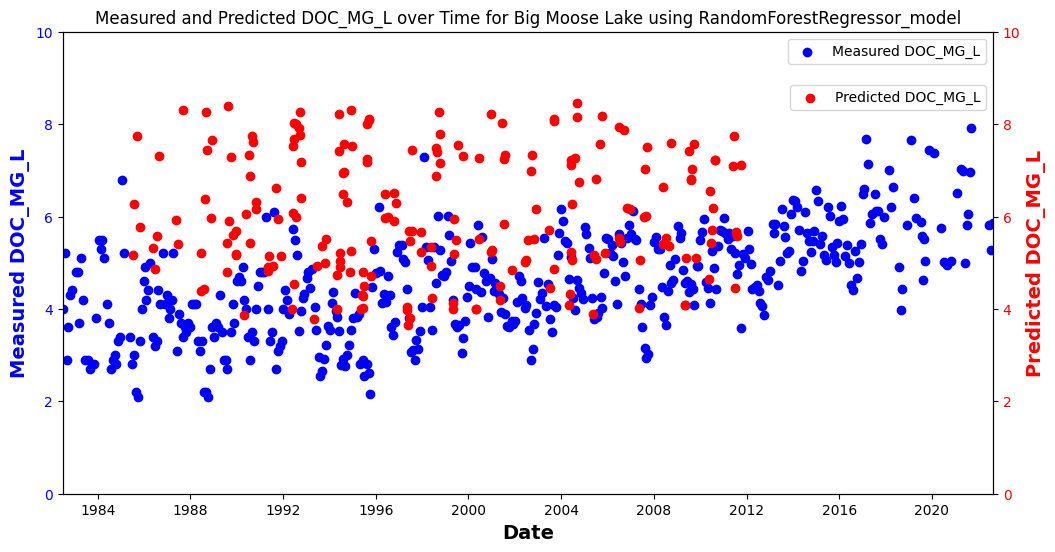

In [46]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = concatenated_df[concatenated_df['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 10

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using RandomForestRegressor_model')
plt.show()



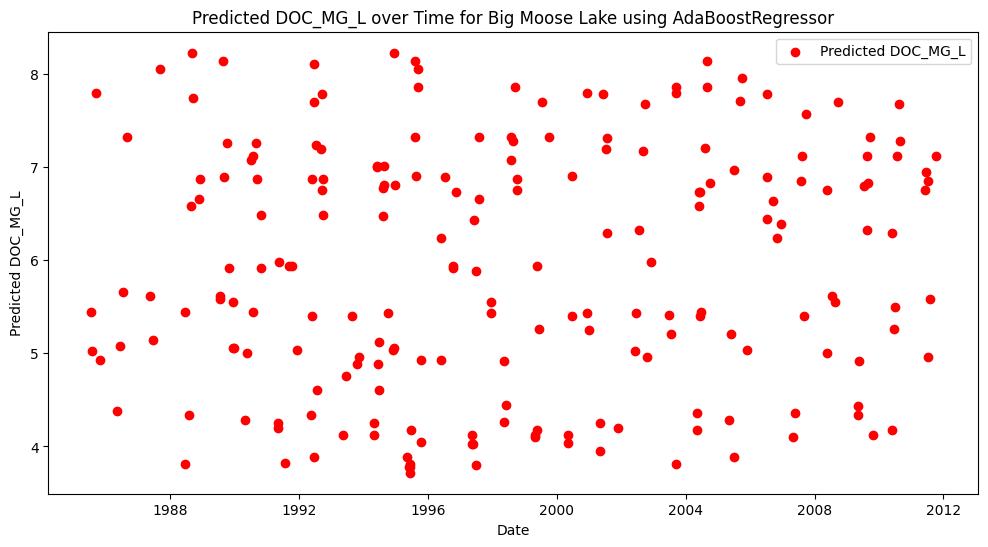

In [47]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model =  AdaBoostRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using AdaBoostRegressor')
plt.legend()
plt.show()


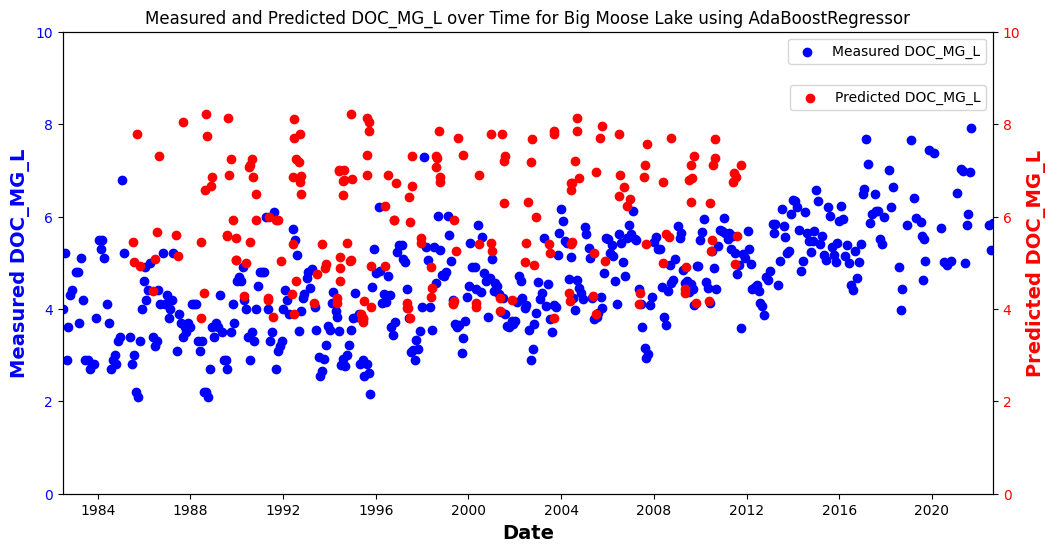

In [48]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = concatenated_df[concatenated_df['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 10

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using AdaBoostRegressor')
plt.show()



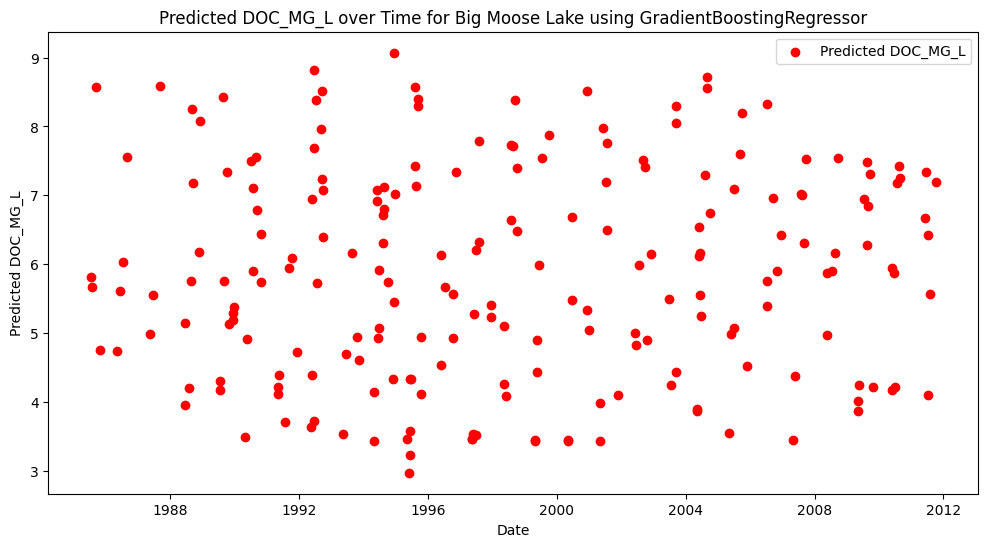

In [49]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor


# Initialize the GradientBoosting
RandomForestRegressor_model =  GradientBoostingRegressor(random_state=42)

RandomForestRegressor_model.fit(X_train, y_train)

# Use the trained model to predict the target variable for the new dataset
predicted_values_all_lakes = RandomForestRegressor_model.predict(X_TEST)



# Assuming 'DOC_MG_L' is the column where you want to store the predictions in 'df_all_lakes'
df_all_lakes['predicted_DOC'] = predicted_values_all_lakes






import matplotlib.pyplot as plt

# Assuming you already have the 'DATE_SMP' column in 'df_all_lakes' (if not, you can add it back)

# Create a copy of the original DataFrame to avoid modifying the original data
df_plot = df_all_lakes.copy()
# Add the predicted values to the DataFrame
df_plot['predicted_DOC'] = predicted_values_all_lakes

# Sort the DataFrame by 'DATE_SMP'
df_plot.sort_values(by='DATE_SMP', inplace=True)

# Filter only the data for 'Big Moose Lake'
df_plot_BigMOOSELAKE = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column
plt.figure(figsize=(12, 6))
plt.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
plt.xlabel('Date')
plt.ylabel('Predicted DOC_MG_L')
# plt.ylim(0,6)
plt.title('Predicted DOC_MG_L over Time for Big Moose Lake using GradientBoostingRegressor')
plt.legend()
plt.show()


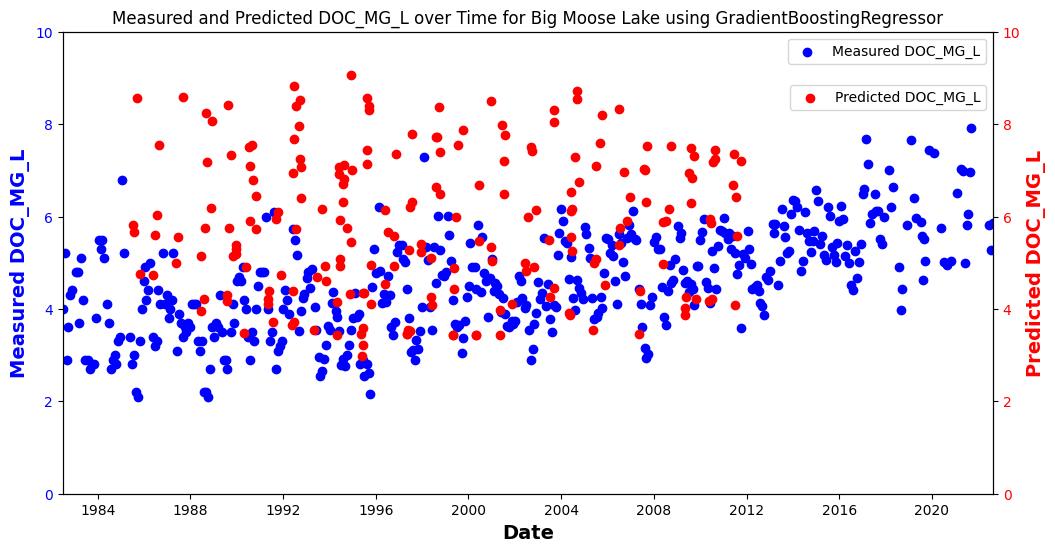

In [50]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

data_modified_BigMOOSELAKE = concatenated_df[concatenated_df['SITE_NAME'] == 'Big Moose Lake']

df_plot_BigMOOSELAKE  = df_plot[df_plot['LAKE_LABEL'] == 34]

# Plot the measured 'DOC_MG_L' values over the 'DATE_SMP' column on the left y-axis
scatter1 = ax1.scatter(data_modified_BigMOOSELAKE['DATE_SMP'], data_modified_BigMOOSELAKE['DOC_MG_L'], label='Measured DOC_MG_L', color='blue')
ax1.set_xlabel('Date', fontweight='bold', fontsize=14)
ax1.set_ylabel('Measured DOC_MG_L', color='blue', fontweight='bold', fontsize=14)  # Adjust font properties here
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot the predicted 'DOC_MG_L' values over the 'DATE_SMP' column on the right y-axis
scatter2 = ax2.scatter(df_plot_BigMOOSELAKE['DATE_SMP'], df_plot_BigMOOSELAKE['predicted_DOC'], label='Predicted DOC_MG_L', color='red')
ax2.set_ylabel('Predicted DOC_MG_L', color='red', fontweight='bold', fontsize=14)  # Adjust font properties here
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis limits for both axes to be the same
x_min = min(data_modified_BigMOOSELAKE['DATE_SMP'].min(), df_plot_BigMOOSELAKE['DATE_SMP'].min())
x_max = max(data_modified_BigMOOSELAKE['DATE_SMP'].max(), df_plot_BigMOOSELAKE['DATE_SMP'].max())

ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

y_min = 0
y_max = 10

ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Place the legend at the top-right corner of the plot
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.title('Measured and Predicted DOC_MG_L over Time for Big Moose Lake using GradientBoostingRegressor')
plt.show()



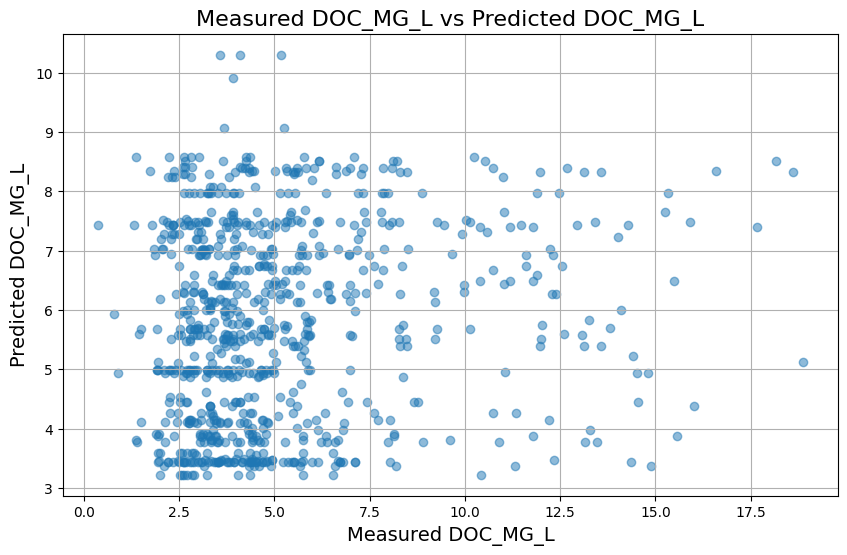

In [51]:
import pandas as pd

# Sort both DataFrames by the date column
concatenated_df.sort_values('DATE_SMP', inplace=True)
df_plot.sort_values('DATE_SMP', inplace=True)


# Merge concatenated_df into df_plot based on the nearest date within the 7-day window
merged_df = pd.merge_asof(df_plot, concatenated_df, on='DATE_SMP', by='SITE_NAME', tolerance=pd.Timedelta(days=3))
merged_df.dropna(inplace=True)
merged_df

import matplotlib.pyplot as plt

# Create a scatter plot of 'DOC_MG_L' vs 'predicted_DOC'
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['DOC_MG_L'], merged_df['predicted_DOC'], alpha=0.5)
plt.title('Measured DOC_MG_L vs Predicted DOC_MG_L', fontsize=16)
plt.xlabel('Measured DOC_MG_L', fontsize=14)
plt.ylabel('Predicted DOC_MG_L', fontsize=14)
plt.grid(True)
plt.show()


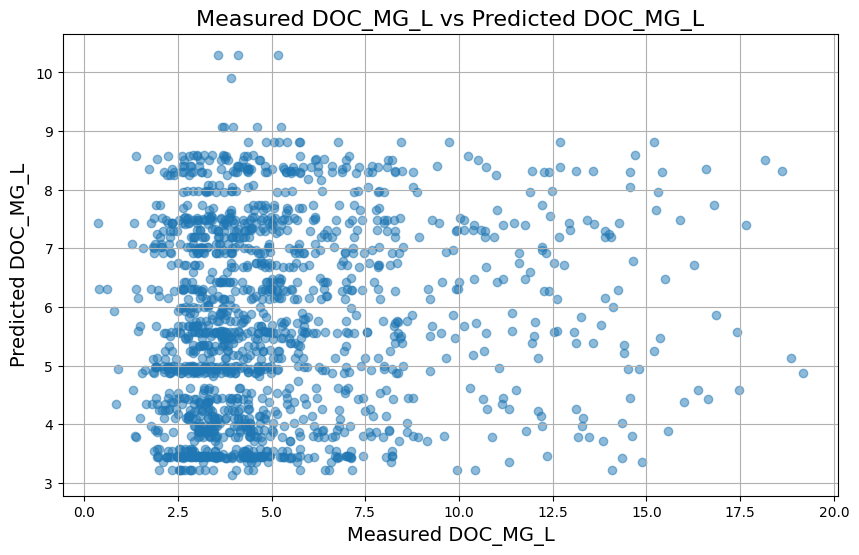

In [52]:
import pandas as pd

# Sort both DataFrames by the date column
concatenated_df.sort_values('DATE_SMP', inplace=True)
df_plot.sort_values('DATE_SMP', inplace=True)


# Merge concatenated_df into df_plot based on the nearest date within the 7-day window
merged_df = pd.merge_asof(df_plot, concatenated_df, on='DATE_SMP', by='SITE_NAME', tolerance=pd.Timedelta(days=7))
merged_df.dropna(inplace=True)
merged_df

import matplotlib.pyplot as plt

# Create a scatter plot of 'DOC_MG_L' vs 'predicted_DOC'
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['DOC_MG_L'], merged_df['predicted_DOC'], alpha=0.5)
plt.title('Measured DOC_MG_L vs Predicted DOC_MG_L', fontsize=16)
plt.xlabel('Measured DOC_MG_L', fontsize=14)
plt.ylabel('Predicted DOC_MG_L', fontsize=14)
plt.grid(True)
plt.show()


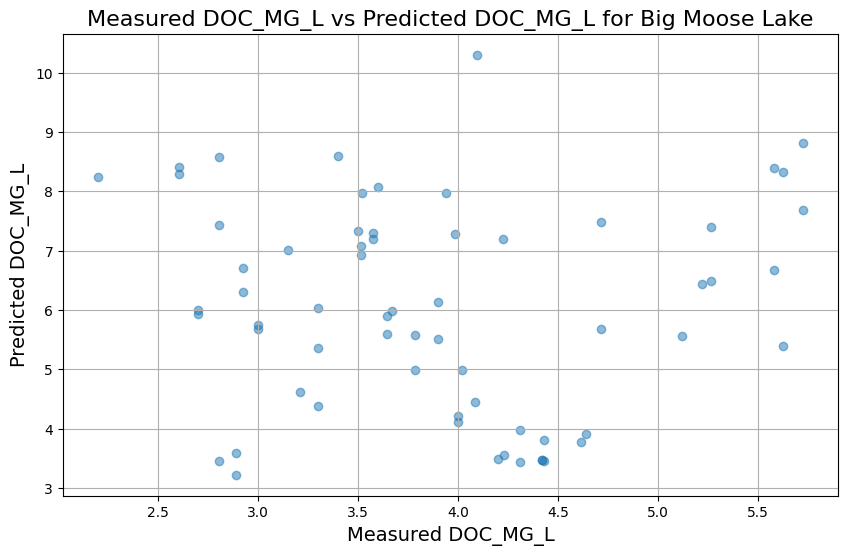

In [53]:
import pandas as pd

# Sort both DataFrames by the date column
concatenated_df.sort_values('DATE_SMP', inplace=True)
df_plot.sort_values('DATE_SMP', inplace=True)

# Merge concatenated_df into df_plot based on the nearest date within the 7-day window
merged_df = pd.merge_asof(df_plot, concatenated_df, on='DATE_SMP', by='SITE_NAME', tolerance=pd.Timedelta(days=7))
merged_df.dropna(inplace=True)

# Filter rows for Big Moose Lake
big_moose_lake_df = merged_df[merged_df['SITE_NAME'] == 'Big Moose Lake']

import matplotlib.pyplot as plt

# Create a scatter plot of 'DOC_MG_L' vs 'predicted_DOC' for Big Moose Lake
plt.figure(figsize=(10, 6))
plt.scatter(big_moose_lake_df['DOC_MG_L'], big_moose_lake_df['predicted_DOC'], alpha=0.5)
plt.title('Measured DOC_MG_L vs Predicted DOC_MG_L for Big Moose Lake', fontsize=16)
plt.xlabel('Measured DOC_MG_L', fontsize=14)
plt.ylabel('Predicted DOC_MG_L', fontsize=14)
plt.grid(True)
plt.show()


In [54]:
merged_df

,blue_mean,green_mean,red_mean,nir_mean,swir1_mean,swir2_mean,blue_stdDev,green_stdDev,red_stdDev,nir_stdDev,swir1_stdDev,swir2_stdDev,DATE_SMP,SITE_NAME,LAKE_LABEL,predicted_DOC,SITE_ID,DOC_MG_L,LAKE_DEPTH_MEAN
206,0.018074,0.028967,0.020771,0.132663,0.057807,0.025563,0.005173,0.010637,0.009242,0.132890,0.061748,0.025131,1985-07-22,Little Echo Pond,146,5.700302,1A1-107,13.800000,0.003955
209,0.018074,0.028967,0.020771,0.132663,0.057807,0.025563,0.005173,0.010637,0.009242,0.132890,0.061748,0.025131,1985-07-22,Clear Pond,52,5.700302,1A2-077,3.300000,0.015282
256,0.018074,0.028967,0.020771,0.132663,0.057807,0.025563,0.005173,0.010637,0.009242,0.132890,0.061748,0.025131,1985-07-22,Arbutus Pond,32,5.700302,1A1-052,5.000000,0.003776
269,0.018074,0.028967,0.020771,0.132663,0.057807,0.025563,0.005173,0.010637,0.009242,0.132890,0.061748,0.025131,1985-07-22,Heart Lake,105,5.700302,1A1-102,3.000000,0.007911
309,0.025898,0.033858,0.026020,0.104598,0.044800,0.021725,0.005633,0.008340,0.008303,0.115611,0.055591,0.021843,1985-07-29,Big Moose Lake,72,5.673881,1A1-103,3.000000,0.010967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27977,0.024909,0.036043,0.035068,0.114496,0.076543,0.038109,0.005446,0.011406,0.013920,0.065904,0.050911,0.025084,2011-10-09,Moss Lake,30,7.193197,1A1-109,3.733451,0.008990
27978,0.023232,0.035700,0.033429,0.113812,0.069839,0.033569,0.004976,0.010871,0.014185,0.064069,0.047527,0.023126,2011-10-09,Moss Lake,30,7.294247,1A1-109,3.733451,0.008990
27990,0.023232,0.035700,0.033429,0.113812,0.069839,0.033569,0.004976,0.010871,0.014185,0.064069,0.047527,0.023126,2011-10-09,Raquette Lake Reservoir,10,7.294247,060315A,13.904075,0.001618
27997,0.024909,0.036043,0.035068,0.114496,0.076543,0.038109,0.005446,0.011406,0.013920,0.065904,0.050911,0.025084,2011-10-09,Queer Lake,45,7.193197,1A1-089,4.055060,0.018339


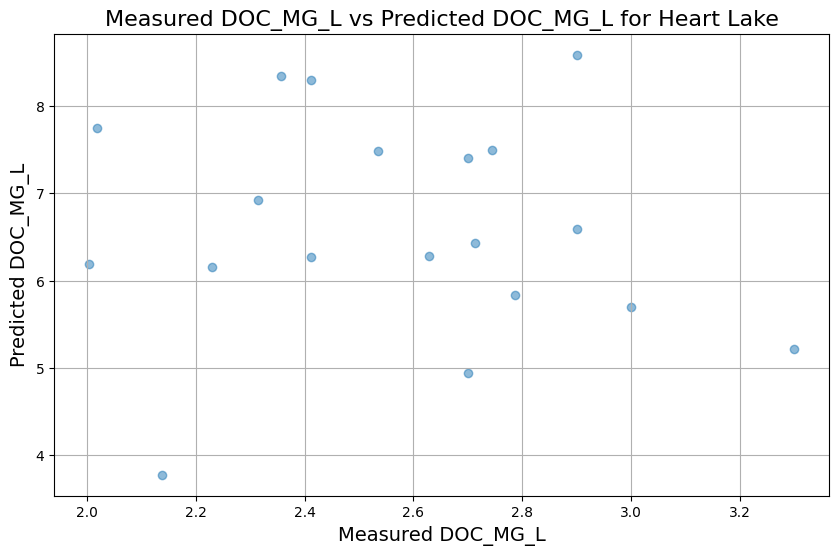

In [55]:
import pandas as pd

# Sort both DataFrames by the date column
concatenated_df.sort_values('DATE_SMP', inplace=True)
df_plot.sort_values('DATE_SMP', inplace=True)

# Merge concatenated_df into df_plot based on the nearest date within the 7-day window
merged_df = pd.merge_asof(df_plot, concatenated_df, on='DATE_SMP', by='SITE_NAME', tolerance=pd.Timedelta(days=7))
merged_df.dropna(inplace=True)

# Filter rows for Big Moose Lake
big_moose_lake_df = merged_df[merged_df['SITE_NAME'] == 'Heart Lake']

import matplotlib.pyplot as plt

# Create a scatter plot of 'DOC_MG_L' vs 'predicted_DOC' for Big Moose Lake
plt.figure(figsize=(10, 6))
plt.scatter(big_moose_lake_df['DOC_MG_L'], big_moose_lake_df['predicted_DOC'], alpha=0.5)
plt.title('Measured DOC_MG_L vs Predicted DOC_MG_L for Heart Lake', fontsize=16)
plt.xlabel('Measured DOC_MG_L', fontsize=14)
plt.ylabel('Predicted DOC_MG_L', fontsize=14)
plt.grid(True)
plt.show()
